1、读取实验数据，使用sklearn库的load_svmlight_file函数读取数据。
2、将数据集切分为训练集和验证集，本次实验不切分测试集。使用train_test_split函数切分数据集。
3、模型参数初始化，可以考虑全零初始化，随机初始化或者正态分布初始化。
4、选择Loss函数及其求导，过程详见课件ppt。
5、求得所有样本对Loss函数的梯度的平均值G。
6、取梯度G的负方向，记为G'。
7、更新模型参数，Wt=Wt+λG' 。λ为学习率，是人为调整的超参数。
8、在验证集上测试并得到Loss函数值Lv。
9、重复步骤5-8若干次，直至Lv趋于收敛，画出Lv随迭代次数的变化图。

In [9]:
#下载数据
import requests
import urllib.request
url="https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/regression/housing_scale"
#r=requests.get(url)   #方式一：request获得数据内容，传回二进制数据，需要用Python3的BytesIO(r.content)来获取
urllib.request.urlretrieve(url, "housing_scale")   #方式二：下载数据集

('housing_scale', <http.client.HTTPMessage at 0x7fe5fa75b780>)

In [10]:
#加载数据：使用sklearn库的load_svmlight_file函数读取数据
from sklearn.datasets import load_svmlight_file
import numpy as np

X,y=load_svmlight_file("housing_scale",n_features=13)  #对应方式二
#print type(X)
X=X.data.reshape(X.shape)   #很重要！！！X数据格式需转换成nd.array形式
y=np.reshape(y,(y.shape[0],1))  #很重要！！！（354，）需转换成（354,1）,否则后面出错
#print type(X)

In [11]:
#数据处理：使用train_test_split函数切分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)   #切割数据集
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(354, 13)
(354, 1)
(152, 13)
(152, 1)


In [12]:
#线性回归与梯度下降算法

#超参初始化
alpha=0.01   #alpha:学习率
iterations=200    #iterations:迭代次数
m, n = np.shape(X_train)
W = np.ones([n,1])     #初始化W全为1或的n*1向量
#print W.shape
count=y_train.size
#print count
losses_train=[]
losses_val=[]
for ecoph in range(iterations):
    #print X_train.shape
    #print(type(X_train))
    #print W.shape
    #print y_train.shape
    
    hypo=np.dot(X_train.T,(np.dot(X_train,W))-y_train)
    G=-alpha*hypo/m   #G:梯度
    W+=G    #梯度下降
    
    yp_train=np.dot(X_train,W)
    loss=np.average(((yp_train-y_train)**2)/2)
    losses_train.append(loss)
    
    yp_val=np.dot(X_test,W)    #yp:预测值
    loss_val=np.average(((yp_val-y_test)**2)/2)  #损失值
    #print("ecoph:",ecoph,",loss:",loss)
    losses_val.append(loss_val)

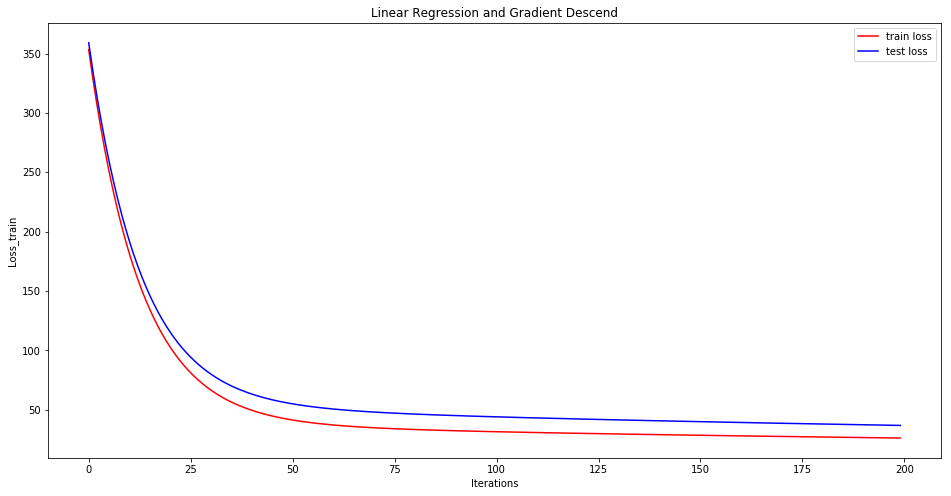

In [13]:
#画出图形
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(losses_train,color="red",label="train loss")
plt.plot(losses_val,color="blue",label="test loss")
plt.title("Linear Regression and Gradient Descend")
plt.legend(loc='upper right')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()